In [1]:
#允许使用TF2执行模式
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("TensorFlow版本是:", tf.__version__)

TensorFlow版本是: 1.14.0


In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Train image shape:", train_images.shape, "Train label shape:", train_labels.shape)

Train image shape: (60000, 28, 28) Train label shape: (60000,)


In [4]:
print("Test image shape:", test_images.shape, "Test label shape:", test_labels.shape)

Test image shape: (10000, 28, 28) Test label shape: (10000,)


In [5]:
print("image data", train_images[1])

image data [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252

In [6]:
print("label data", train_labels[1])

label data 0


In [7]:
type(train_images[1,1,1])

numpy.uint8

In [8]:
def plot_image(image):
    plt.imshow(image.reshape(28,28), cmap = 'binary')
    plt.show()

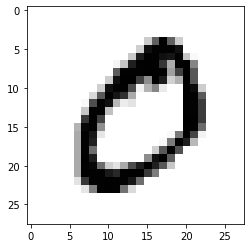

In [9]:
plot_image(train_images[1])

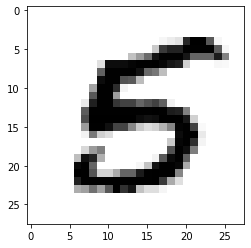

In [10]:
plot_image(train_images[20000])

In [11]:
int_array = np.array([i for i in range(64)])
print(int_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [12]:
int_array.reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [13]:
int_array.reshape(4,16)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

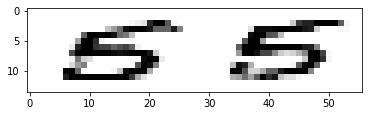

In [14]:
plt.imshow(train_images[20000].reshape(14,56), cmap = 'binary')

In [15]:
total_num = len(train_images)
valid_split = 0.2
train_num = int(total_num*(1-valid_split))

train_x = train_images[:train_num]
train_y = train_labels[:train_num]

valid_x = train_images[train_num:]
valid_y = train_labels[train_num:]

test_x = test_images
test_y = test_labels

In [16]:
valid_x.shape

(12000, 28, 28)

In [17]:
train_x = train_x.reshape(-1,784)
valid_x = valid_x.reshape(-1,784)
test_x = test_x.reshape(-1,784)

In [18]:
train_x = tf.cast(train_x/255.0, tf.float32)
valid_x = tf.cast(valid_x/255.0, tf.float32)
test_x = tf.cast(test_x/255.0, tf.float32)

In [19]:
train_x[1]

<tf.Tensor: id=9, shape=(784,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0

In [20]:
x = [3, 4]
tf.one_hot(x, depth=10)

<tf.Tensor: id=15, shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [21]:
train_y = tf.one_hot(train_y, depth=10)
valid_y = tf.one_hot(valid_y, depth=10)
test_y = tf.one_hot(test_y, depth=10)

In [22]:
train_y

<tf.Tensor: id=21, shape=(48000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)>

In [23]:
def model(x, w, b):
    pred = tf.matmul(x, w) + b
    return tf.nn.softmax(pred)

In [24]:
W = tf.Variable(tf.random.normal([784,10], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros([10]), dtype=tf.float32)

In [25]:
def loss(x, y, w, b):
    pred = model(x, w, b)
    loss_ = tf.keras.losses.categorical_crossentropy(y_true=y, y_pred=pred)
    return tf.reduce_mean(loss_)

In [26]:
training_epochs = 20
batch_size = 50
learning_rate = 0.001

In [27]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [29]:
def accuracy(x, y, w, b):
    pred = model(x, w, b)
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [30]:
total_step = int(train_num/batch_size)
loss_list_train = []
loss_list_valid = []
acc_list_train = []
acc_list_valid = []

for epoch in range(training_epochs):
    for step in range(total_step):
        xs = train_x[step*batch_size:(step+1)*batch_size]
        ys = train_y[step*batch_size:(step+1)*batch_size]
        
        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads, [W, B]))
        
    loss_train = loss(train_x, train_y, W, B).numpy()
    loss_valid = loss(valid_x, valid_y, W, B).numpy()
    acc_train = accuracy(train_x, train_y, W, B).numpy()
    acc_valid = accuracy(valid_x, valid_y, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    acc_list_train.append(acc_train)
    acc_list_valid.append(acc_valid)
    print("epoch={:3d},train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}".format(epoch+1, loss_train, acc_train, loss_valid, acc_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch=  1,train_loss=1.7182,train_acc=0.6741,val_loss=1.6214,val_acc=0.6893
epoch=  2,train_loss=1.0099,train_acc=0.7927,val_loss=0.9378,val_acc=0.8027
epoch=  3,train_loss=0.7898,train_acc=0.8339,val_loss=0.7370,val_acc=0.8414
epoch=  4,train_loss=0.6726,train_acc=0.8548,val_loss=0.6353,val_acc=0.8608
epoch=  5,train_loss=0.5976,train_acc=0.8683,val_loss=0.5724,val_acc=0.8739
epoch=  6,train_loss=0.5450,train_acc=0.8774,val_loss=0.5294,val_acc=0.8810
epoch=  7,train_loss=0.5059,train_acc=0.8844,val_loss=0.4980,val_acc=0.8872
epoch=  8,train_loss=0.4755,train_acc=0.8896,val_loss=0.4741,val_acc=0.8913
epoch=  9,train_loss=0.4511,train_acc=0.8939,val_loss=0.4549,val_acc=0.8942
epoch= 10,train_loss=0.4309,train_acc=0.8980,val_loss=0.4391,val_acc=0.8965
epoch= 11,train_loss=0.4139,train_acc=0.9007,val_loss=0.4259,val_acc=0.8983
epoch= 12,train_loss=0.3994,train_acc=0.9035,val_loss=0.4149,val_acc=0

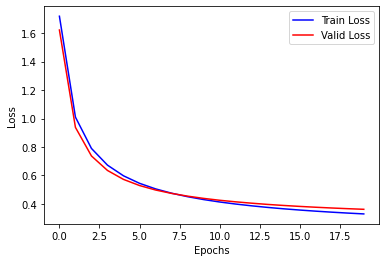

In [31]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train, 'blue', label="Train Loss")
plt.plot(loss_list_valid, 'red', label="Valid Loss")
plt.legend(loc=1)

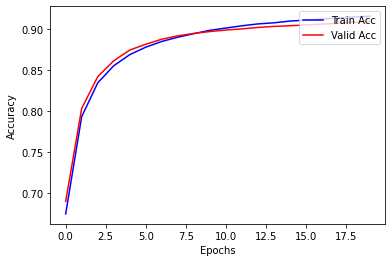

In [32]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc_list_train, 'blue', label="Train Acc")
plt.plot(acc_list_valid, 'red', label="Valid Acc")
plt.legend(loc=1)

In [33]:
def predict(x, w, b):
    pred = model(x, w, b)
    result = tf.argmax(pred, 1).numpy()
    return result

In [34]:
pred_test = predict(test_x, W, B)

In [35]:
pred_test[0]

7

In [36]:
def plot_images_labels_prediction(images,     # 图像列表
                                  labels,     # 标签列表
                                  prediction, # 预测值列表
                                  index,      # 从第index个开始显示
                                  num=10):    # 缺省一次显示 10 幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12) # 1英寸等于2.54cm
    if num > 25:
        num = 25 # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index], (28, 28)), cmap="binary") # 显示第index个图像

        title = "label=" + str(np.argmax(labels[index])) # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[index])
        
        ax.set_title(title, fontsize=10) # 显示图上的title信息
        ax.set_xticks([]) # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()

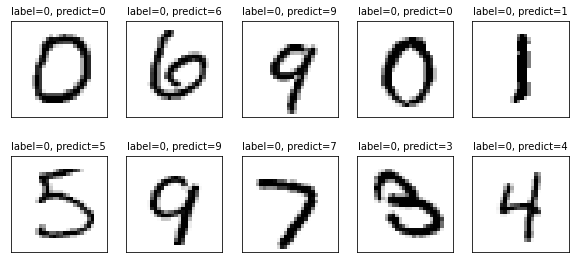

In [37]:
plot_images_labels_prediction(test_images, test_labels, pred_test, 10, 10)